In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("index.csv")
print(df.head())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


In [5]:
print(df.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [6]:
coffee_cols = [c for c in df.columns if "coffee" in c.lower() or "product" in c.lower() or "name" in c.lower()]
if coffee_cols:
    coffee_col = coffee_cols[0]
    top_products = df[coffee_col].value_counts().nlargest(10)
    print("\n---- TOP PRODUCTS ----")
    print(top_products)


---- TOP PRODUCTS ----
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


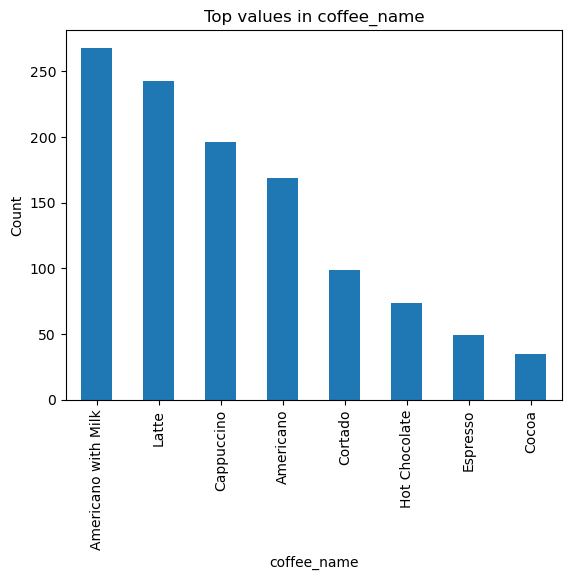

In [8]:
top_products.plot(kind="bar", title=f"Top values in {coffee_col}")
plt.ylabel("Count")
plt.show()

In [9]:
datetime_cols = [c for c in df.columns if "datetime" in c.lower() or "time" in c.lower()]
if datetime_cols:
    dtcol = datetime_cols[0]
    df[dtcol] = pd.to_datetime(df[dtcol], errors="coerce")
    df["hour"] = df[dtcol].dt.hour
    hourly = df["hour"].value_counts().sort_index()
    print("\n---- TRANSACTIONS BY HOUR ----")
    print(hourly)


---- TRANSACTIONS BY HOUR ----
hour
7      13
8      44
9      50
10    133
11    103
12     87
13     78
14     76
15     65
16     77
17     77
18     75
19     96
20     54
21     70
22     35
Name: count, dtype: int64


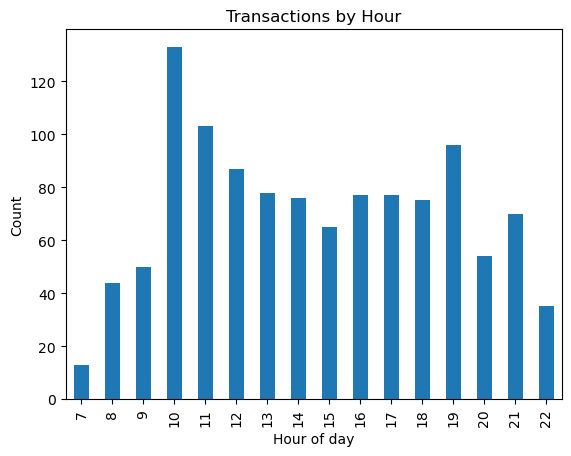

In [10]:
hourly.plot(kind="bar", title="Transactions by Hour")
plt.xlabel("Hour of day")
plt.ylabel("Count")
plt.show()

In [11]:
date_cols = [c for c in df.columns if "date" in c.lower() and "time" not in c.lower()]
if date_cols:
    dcol = date_cols[0]
    df[dcol] = pd.to_datetime(df[dcol], errors="coerce")
    df["month"] = df[dcol].dt.to_period("M")
    monthly = df.groupby("month").size()
    print("\n---- TRANSACTIONS BY MONTH ----")
    print(monthly)



---- TRANSACTIONS BY MONTH ----
month
2024-03    206
2024-04    196
2024-05    267
2024-06    227
2024-07    237
Freq: M, dtype: int64


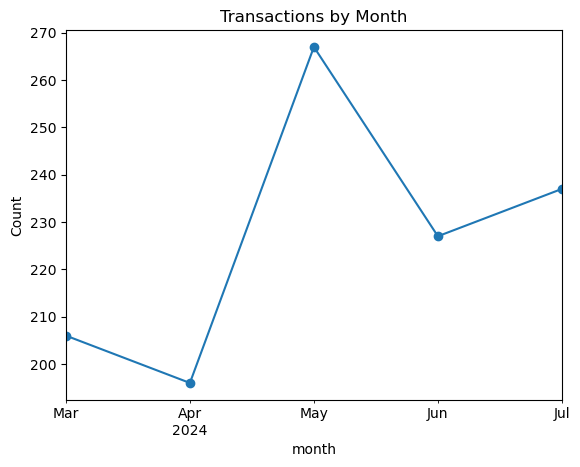

In [12]:
monthly.plot(kind="line", marker="o", title="Transactions by Month")
plt.ylabel("Count")
plt.show()